## Logistic Regression

The cost function used in the logistic regression model is the log loss:

$$Log\;Loss = -\frac{1}{n}\sum_{i = 1}^{n} y\;log(\hat{y}) + (1-y)\;log(1-\hat{y})$$

where y is the dataset's training label (0 or 1) and $\hat{y}$ is the label value predicted by the model (something between 0 and 1), given the features values. The value of $\hat{y}$ is obtained by the use of the sigmoid activation function in a linear model. So, we define:


$$z = b + \sum_{i = 1}^{m} w_{i} x_{i}$$

$$\hat{y} = sigmoid(z) = sig(z) = \frac{1}{1 + e^{-z}}$$

Where $w_{i}$ is the weight of the $x_{i}$ feature in the model.

In this model, we will also apply the $L_{1}$ regularization, responsible to bring the weights of less important features (with very small weights) to practically zero, making, then, a feature selection that generates a more sparse model. The $L_{1}$ regularization function is given by:

$L_{1}\;regularization\;term = \sum_{i = 1}^{m} |w_{i}|$

Then, the function we want to minimize is:

$$f(\theta) = Log\;Loss + L_{1}\;regularization\;term = -\frac{1}{n}\sum_{i = 1}^{n} y_{i}\;log(\hat{y}_{i}) + (1-y_{i})\;log(1-\hat{y}_{i}) + \lambda\sum_{i = 1}^{m} |w_{i}|$$

where $\lambda$ is the regularization constant, $\theta = (w_{1}, w_{2}, ..., w_{n}, b)$, where $n$ is the number of data rows we have in the training set and $m$ is the number of features. 

We know that: $\frac{d\hat{y}_{i}}{dz_{i}} = sig(z_{i}) \cdot (1-sig(z_{i}))$ (verify!)

We can, then, calculate the partial derivatives of $\hat{y}_{i}$:

$$\frac{\partial{\hat{y}_{i}}}{\partial{w_{k}}} = \frac{d\hat{y}_{i}}{dz_{i}} \cdot \frac{\partial{z_{i}}}{\partial{w_{k}}} = sig(z_{i})\cdot(1-sig(z_{i}))\cdot x_{k}$$

for each feature $x_{k}$, and:

$$\frac{\partial{\hat{y}_{i}}}{\partial{b}} = \frac{d\hat{y}_{i}}{dz_{i}} \cdot \frac{\partial{z_{i}}}{\partial{b}} = sig(z_{i})\cdot(1-sig(z_{i}))$$

Calculating now the partial derivatives of $f(\theta)$:

$$\frac{\partial{f}}{\partial{w_{k}}} = -\frac{1}{n}\sum_{i = 1}^{n}\left[y_{i}\cdot \frac{sig(z_{i})\cdot(1-sig(z_{i}))\cdot (x_{k})_{i}}{\hat{y}_{i}} - (1-y_{i})\cdot\frac{sig(z_{i})\cdot(1-sig(z_{i}))\cdot (x_{k})_{i}}{(1-\hat{y}_{i})}\right] + \lambda \frac{|w_{k}|}{w_{k}}$$

$$\frac{\partial{f}}{\partial{b}} = -\frac{1}{n}\sum_{i = 1}^{n}\left[y_{i}\cdot \frac{sig(z_{i})\cdot(1-sig(z_{i}))}{\hat{y}_{i}} - (1-y_{i})\cdot\frac{sig(z_{i})\cdot(1-sig(z_{i}))}{(1-\hat{y}_{i})}\right]$$

With $\alpha$ being the model's learning rate, the new weights and bias values are going to be:

$$w_{k}' = w_{k} - \alpha \frac{\partial{f}}{\partial{w_{k}}}$$

$$b' = b - \alpha \frac{\partial{f}}{\partial{b}}$$

Developing, we finally have:

$$w_{k}' = w_{k} + \frac{\alpha}{n}\sum_{i = 1}^{n}(x_{k})_{i}\cdot\left(y_{i} - \hat{y}_{i}\right) - \alpha \lambda \frac{|w_{k}|}{w_{k}}$$

$$b' = b + \frac{\alpha}{n}\sum_{i = 1}^{n}\left(y_{i} - \hat{y}_{i}\right) $$

### Importing Libraries

In [1]:
import sys

sys.path.append('../../..')
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, precision_score, recall_score
from model_implementation_utils import *
from preprocessing import preprocessing_pipeline
from logistic_regressor import LogisticRegressor
from logistic_regression_parameters import LogisticRegressionParameters

### Importing Data

In [2]:
data_path = os.path.join('../data/', 'Covid Data.csv')
data = pd.read_csv(data_path)
data = data.rename(columns = {'CLASIFFICATION_FINAL': 'CLASSIFICATION_FINAL'})
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASSIFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


### Split and Scaling

In [3]:
random_state = 0
label = 'DIED'
data.loc[data['DATE_DIED'] == '9999-99-99', label] = 2
data.loc[data['DATE_DIED'] != '9999-99-99', label] = 1
data.drop(columns = ['DATE_DIED'], inplace = True)
features = list(set(data.columns).difference({label}))
X = data[features]
y = data[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)

### Preprocessing

In [4]:
X_train, X_test, y_train, y_test = preprocessing_pipeline(X_train, X_test, y_train, y_test)

In [5]:
X_train.head()

,OTHER_DISEASE,INMSUPR,ASTHMA,INTUBED,ICU,SEX,RENAL_CHRONIC,PATIENT_TYPE,COPD,TOBACCO,...,is_INMSUPR_defined,is_HIPERTENSION_defined,is_CARDIOVASCULAR_defined,is_RENAL_CHRONIC_defined,is_OTHER_DISEASE_defined,is_OBESITY_defined,is_TOBACCO_defined,is_INTUBED_defined,is_ICU_defined,covid_degree
592908,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
184386,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1021782,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
59606,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
93792,1.0,1.0,1.0,0.5,0.5,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
y_train.head()

592908     0.0
184386     0.0
1021782    0.0
59606      0.0
93792      0.0
Name: DIED, dtype: float64

### Defining Parameters

In [7]:
parameters = LogisticRegressionParameters()
parameters.initial_weights = np.zeros(len(X_train.columns))
parameters.epochs = 100
parameters.batch_size = 1000000
parameters.alpha = 0.5
parameters.gamma_reg = 0.01

In [8]:
print(parameters)

alpha = 0.5
batch_size = 1000000
epochs = 100
gamma_reg = 0.01
initial_bias = 0
initial_weights = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
lambda_reg = 0.0
random_state = 0



### Training a Model

In [9]:
model = LogisticRegressor(parameters)
model.fit(X_train, y_train, False)

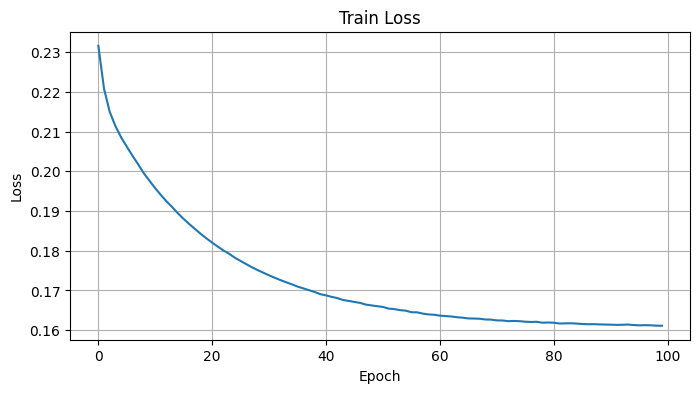

In [10]:
plt.figure(figsize=(8, 4))
plt.plot(model.get_train_loss())
plt.title("Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

### Test

In [11]:
model.predict(X_test)

array([0.02523975, 0.02497748, 0.02568098, ..., 0.02581888, 0.02609691,
       0.02525093])

In [12]:
log_loss(model, X_test, y_test)

0.1611631322380691

In [13]:
precisions, recalls, thresholds = precision_recall_curve(y_test, model.predict(X_test))

In [14]:
def plot_precision_recall_vs_threshold(precisions_list, recalls_list, thresholds_list):
    plt.plot(thresholds_list, precisions_list[:-1], "b--", label="Precision")
    plt.plot(thresholds_list, recalls_list[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

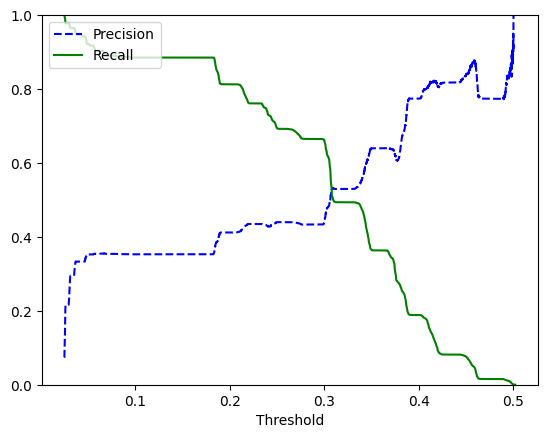

In [15]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [16]:
threshold = 0.15
y_pred = model.predict(X_test) > threshold
print('Prediction values count:')
(pd.DataFrame(y_pred) > threshold).astype(int).value_counts()

Prediction values count:


0    171084
1     38631
Name: count, dtype: int64

In [17]:
precision_score(y_test, y_pred)

0.3528772229556574

In [18]:
recall_score(y_test, y_pred)

0.8852522891096825

#### Conclusion

Despite the reduced number of iterations and the slower speed compared to already implemented Machine Learning libraries, we achieved a valid result. This demonstrates that our model does indeed work.

We will not implement the metrics of the logistic regression model because they are relatively simple, and the goal was to implement such a model from scratch with the significant challenge of handling millions of data simultaneously in the prediction function at a speed that allows the model to be trained in a timely manner. The evaluation of metrics can be done using the sklearn library, as was done in notebook sklearn_logistic_regression.ipynb, which covers step-by-step feature engineering and a more practical application of the logistic regression model.